In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

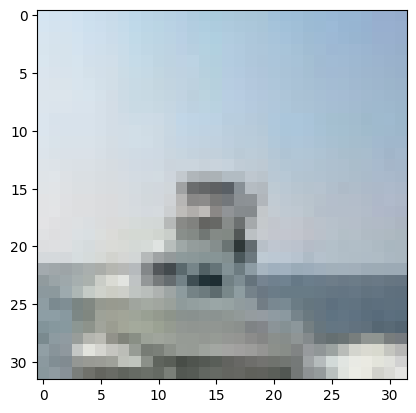

Nay la: [4]


In [ ]:
# display an image from the dataset
import matplotlib.pyplot as plt
hinh = x_train[100]
plt.imshow(hinh, cmap=plt.cm.binary)
plt.show()
print('Nay la:', y_train[10])

In [ ]:
x_train=x_train.reshape((50000,32*32*3)) #60k tấm ảnh
x_train=x_train.astype('float')/255

x_test=x_test.reshape((10000,32*32*3)) #60k tấm ảnh
x_test=x_test.astype('float')/255


print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
#Chuyển 1 bit thành nhiều bit đầu ra
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

from keras.utils import to_categorical
y_train = to_categorical(y_train,10)  #1 bit thành 10 bit
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
from keras.models import Sequential #Sequential: mô tả tuần tự
from keras.layers import Dense #Dense: fully connected, 1 tế bào kết nối hết đầy đủ đến các tế bào tiếp theo nó
model = Sequential() #Lấy mô hình mạng ANN
model.add(Dense(512, activation='relu', input_shape=(32*32,)))       #hàm truyền là hàm relu()
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Chuyển 1 bit thành nhiều bit đầu ra
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)  #1 bit thành 10 bit
y_test = to_categorical(y_test,10)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=128) #train model, 1 lô bốc 128 dữ liệu để học
test_loss, test_acc = model.avaluate(x_test, y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

In [ ]:
model.save('test1.h5') #Chạy xongg mô hình lưu tên file đuôi .h5
#Chép vô máy tính, mỗi lần chạy gọi nó ra
model10=load_model('test1.h5')

y_pred=model10.predict(x)


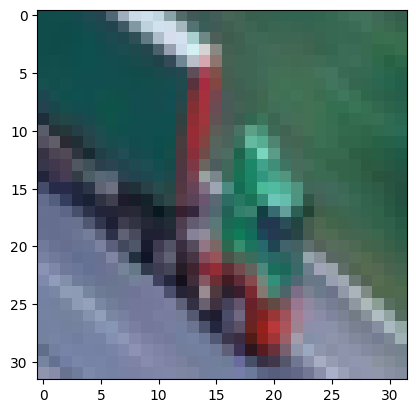

This image is: [9]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               1573376   
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 8s 20ms/step - loss: 2.2293 - accuracy: 0.2619
Epoch 2/10
391/391 [==============================] - 7s 18ms/step - loss: 1.7962 - accuracy: 0.3559
Epoch 3/10
391/391 [==============================] - 7s 19ms/step - loss: 1.7086 - accuracy: 0.3910
Epoch 4/10
391/391 [==============================] - 8s 19ms/step - loss: 1.6495 - accuracy: 0.4148
Epoch 5/10
391/39

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# load the cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# display an image from the dataset
plt.imshow(train_images[50])
plt.show()
print('This image is:', train_labels[50])

# preprocess the data
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# add a virtual layer to the input shape
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)
print('test loss:', test_loss)

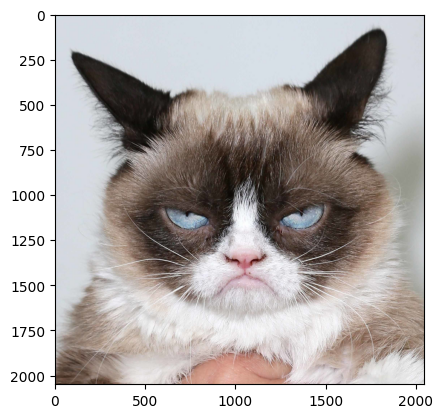

In [ ]:
img=plt.imread('/content/ad.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 48ms/step


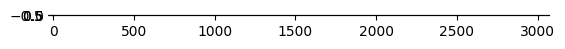

In [ ]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np

img=load_img('/content/ad.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255

np.argmax(model.predict(img),axis=-1)
plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 17ms/step


array([7])

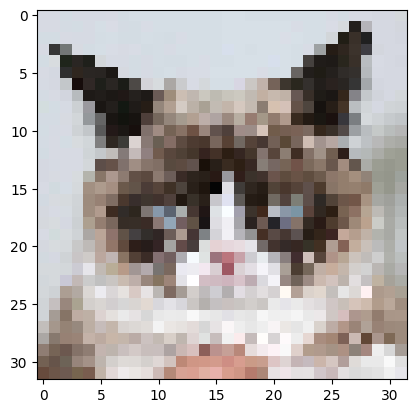

In [ ]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
img = load_img('/content/ad.jpg',target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

In [ ]:
#Làm lại bài hôm nay, Cifar100, fashion MNIST